In [1]:
from pandas import DataFrame
from pandas import concat
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import LSTM

import numpy as np

Using TensorFlow backend.


In [2]:
values = np.random.random((100, 2))

In [3]:
input_train, target_train = values[0:70, 0], values[0:70, 1]
input_test , target_test  = values[70:, 0], values[70:, 1]

input_train = input_train.reshape(len(input_train), 1, 1)
input_test = input_test.reshape(len(input_test), 1, 1)

In [4]:
epochs = 10
batchsize = 10
timestep = 1
input_dim = 1

batchsize

10

In [5]:
# Build model
model = Sequential()
model.add(LSTM(10, activation='sigmoid', batch_input_shape=(batchsize, timestep, input_dim), return_sequences=True, stateful=True))
model.add(Dropout(0.5))
model.add(LSTM(8, stateful=True))
model.add(Dropout(0.5))
model.add(Dense(1, activation='tanh'))
model.compile(optimizer='rmsprop',
              loss='mse', metrics=['accuracy'])

In [6]:
# history = model.fit(inputs, y, epochs=100, batch_size=len(values), verbose=0)
history = model.fit(input_train, target_train, epochs=epochs, 
                   batch_size=batchsize, shuffle=False,
                   validation_data=(input_test, target_test))

Train on 70 samples, validate on 30 samples
Epoch 1/10
70/70 [==============================] - 2s - loss: 0.2849 - acc: 0.0000e+00 - val_loss: 0.2891 - val_acc: 0.0000e+00
Epoch 2/10
70/70 [==============================] - 0s - loss: 0.2208 - acc: 0.0000e+00 - val_loss: 0.2283 - val_acc: 0.0000e+00
Epoch 3/10
70/70 [==============================] - 0s - loss: 0.1884 - acc: 0.0000e+00 - val_loss: 0.1835 - val_acc: 0.0000e+00
Epoch 4/10
70/70 [==============================] - 0s - loss: 0.1770 - acc: 0.0000e+00 - val_loss: 0.1478 - val_acc: 0.0000e+00
Epoch 5/10
70/70 [==============================] - 0s - loss: 0.1443 - acc: 0.0000e+00 - val_loss: 0.1357 - val_acc: 0.0000e+00
Epoch 6/10
70/70 [==============================] - 0s - loss: 0.1347 - acc: 0.0000e+00 - val_loss: 0.1229 - val_acc: 0.0000e+00
Epoch 7/10
70/70 [==============================] - 0s - loss: 0.1260 - acc: 0.0000e+00 - val_loss: 0.0972 - val_acc: 0.0000e+00
Epoch 8/10
70/70 [==============================] - 0

In [7]:
# new_values = np.random.random(100).reshape(100, 1, 1)
predict = model.predict(input_test, batch_size=batchsize)

In [8]:
target_test = target_test.reshape(30, 1)

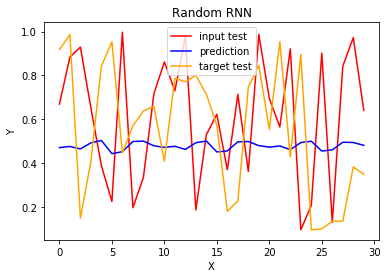

In [9]:
import matplotlib.pyplot as plt 
plt.plot(input_test.reshape(30,1), color='red', label="input test")
plt.plot(predict.reshape(30,1), color='blue', label="prediction")
plt.plot(target_test.reshape(30,1), color='orange', label="target test")
plt.title("Random RNN")
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()